In [1]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read the dataset using pandas
data = pd.read_csv('data/salary_data.csv')

# This displays the top 5 rows of the data
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


/Users/nvtrang/code/repos/dev/generic/pythonenv/cairo_venv/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

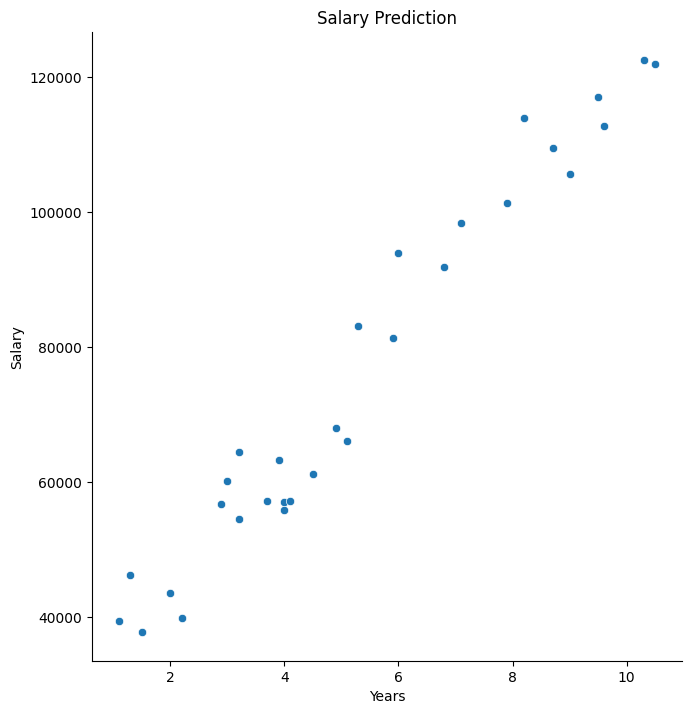

In [2]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

## Cooking the data

In [3]:
# Cooking the data
X = data['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [4]:
# Cooking the data
y = data['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [5]:
# Import Segregating data from scikit learn
from sklearn.model_selection import train_test_split

# Split the data for train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

# Create new axis for x column
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

# Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

/var/folders/y5/vgc8zktx66373p5x666x1d780000gn/T/ipykernel_18314/4124707175.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]
/var/folders/y5/vgc8zktx66373p5x666x1d780000gn/T/ipykernel_18314/4124707175.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


LinearRegression()

## The model

In [6]:
# lr.get_params()
lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([9731.20383825]),
 'rank_': 1,
 'singular_': array([11.78780645]),
 'intercept_': 25202.887786154883}

In [7]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 25202.887786154883
Coefficient of the line: [9731.20383825]


## Prediction
Bob call predict function

In [8]:
y_pred = lr.predict(X_test)

In [16]:
y_pred
# X_test

array([ 61208.34198766, 117649.32424949, 125434.28732008,  65100.82352296,
        53423.37891707,  64127.70313914, 118622.44463331, 112783.72233036,
        54396.49930089])

In [15]:
prediction_input = [[3], [3.7]]
prediction_output = lr.predict(prediction_input)

prediction_output

array([54396.49930089, 61208.34198766])

In [18]:
lr.coef_[0] * 3 + lr.intercept_

54396.49930089101